In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 100)

import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# cow_id vs lactation_number?
# remark, r, t, b???
columns = ['cow_id', 'lactation_number', 'event', 'days_in_milk', 'date', 'remark', 'r', 't', 'b']

breedings = pd.read_csv(
    'data/breedings.csv',
    header=0,
    names=columns,
    converters={'event': lambda x: x.strip(), 
                'date': lambda x: pd.to_datetime(x, errors='coerce'), 
                'remark': lambda x: x.strip(), 
                'r': lambda x: x.strip(), 
                'b': lambda x: x.strip()})

breedings = breedings.sort_values(by=['date'])
breedings

,cow_id,lactation_number,event,days_in_milk,date,remark,r,t,b
1290,11054,1,BRED,57,2018-03-01,14H13976,P,7,F
483,8150,4,BRED,104,2018-03-01,7H13844,O,7,F
1944,11801,0,BRED,454,2018-03-01,507H12111,O,6,A
1968,11831,0,BRED,443,2018-03-01,507H12111,O,6,A
383,6518,1,BRED,87,2018-03-01,7H12256,P,7,F
...,...,...,...,...,...,...,...,...,...
4689,13407,0,BRED,449,2019-12-30,7H14330,P,11,F
4727,13438,0,BRED,439,2019-12-30,507H14451,O,11,F
1909,11741,2,BRED,70,2019-12-31,14H14881,O,4,F
1870,11687,2,BRED,90,2019-12-31,7H14879,P,4,F


In [3]:
# data_entry = (cow_id, lactation_number, calving_date, event)

calves_dict = dict()
for index, row in breedings.iterrows():
    calving_date = row.date - pd.Timedelta(days=row.days_in_milk)
    entry = (row.cow_id, row.lactation_number, calving_date, row.event)
    info = {'days_in_milk': row.days_in_milk, 'date': row.date, 'remark': row.remark, 'r': row.r, 't': row.t, 'b': row.b}
    if entry in calves_dict:
        # this cow has already been born, update entry
        log = calves_dict[entry]
        # check for errors
        assert log[-1]['days_in_milk'] <= info['days_in_milk'] and log[-1]['date'] <= info['date']
        log.append(info)
    else:
        # calf was born 
        calves_dict[entry] = [info]

# for x, y in calves_dict.items():
#     print(x)
#     print(y)
#     print()

In [4]:
calves = pd.DataFrame(data=calves_dict.keys(), columns=['cow_id', 'lactation_number', 'calving_date', 'event'])
calves = calves.sort_values(by=['cow_id'])
calves

,cow_id,lactation_number,calving_date,event
799,1,3,2018-06-04,BRED
2243,1,4,2019-06-09,BRED
787,2,2,2018-06-04,BRED
934,4,2,2018-07-08,BRED
2168,6,2,2019-01-01,BRED
...,...,...,...,...
2661,13528,0,2018-11-25,BRED
2644,13536,0,2018-11-26,BRED
2665,13537,0,2018-11-27,BRED
2654,13560,0,2018-12-05,BRED


In [5]:
data = pd.DataFrame()

i = 0
for file_name in os.listdir('data/'):
    if i > 10:
        break
    i += 1
    if file_name != 'breedings.csv' and file_name.split('.')[1] == 'csv':
        data = data.append(pd.read_csv('data/' + file_name))

In [6]:
# ??: 'act_heat_index', 'act_heat_index_smart', 'heat_index', 'temp_dec_index', 'temp_height_index', 'temp_inc_index'
data.columns = ['act_heat_index', 'act_heat_index_smart', 'activity', 'heat_index', 'activity_1day_avg', '60percentile_of_5day_temp', 'temp', 'temp_dec_index', 'temp_height_index', 'temp_inc_index', 'temp_without_drink_cycles', 'time', 'cow_id']

data.time = pd.to_datetime(data.time, errors='coerce')

data

,act_heat_index,act_heat_index_smart,activity,heat_index,activity_1day_avg,60percentile_of_5day_temp,temp,temp_dec_index,temp_height_index,temp_inc_index,temp_without_drink_cycles,time,cow_id
0,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-18 16:56:00,9915
1,NaN,NaN,3.04,NaN,1.855,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-18 17:06:00,9915
2,NaN,NaN,1.07,NaN,2.108,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-18 17:16:00,9915
3,NaN,NaN,4.33,NaN,3.437,NaN,NaN,NaN,NaN,NaN,39.34,2018-07-18 17:26:00,9915
4,NaN,NaN,7.89,NaN,4.864,NaN,NaN,NaN,NaN,NaN,39.58,2018-07-18 17:36:00,9915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38284,NaN,NaN,NaN,NaN,NaN,39.88,NaN,NaN,-0.109,NaN,NaN,2019-08-06 21:52:00,11114
38285,NaN,NaN,8.32,NaN,11.819,NaN,NaN,0.0,NaN,0.057,39.69,2019-08-06 22:00:00,11114
38286,NaN,NaN,NaN,NaN,NaN,39.88,NaN,NaN,-0.190,NaN,NaN,2019-08-06 22:02:00,11114
38287,NaN,NaN,8.82,NaN,13.239,NaN,NaN,NaN,NaN,0.052,39.61,2019-08-06 22:10:00,11114


In [7]:
# it looks like there's additional rows added with missing data
# aka rows beyond the 10 minute intervals - so remove them
data = data[~data.activity_1day_avg.isnull()]

In [8]:
# NaT from first one only (no missing times)
# set(data.time.diff())

In [9]:
print(len(data))
print(set(data.cow_id))

495630
{11712, 9312, 9992, 11722, 12266, 12235, 12301, 11114, 9904, 9915, 11069}


In [10]:
print(data.isnull().sum() / len(data))
# heat_index, temp always empty
# activity, activity_1day_avg, time, cow_id

act_heat_index               0.492845
act_heat_index_smart         0.505054
activity                     0.000000
heat_index                   1.000000
activity_1day_avg            0.000000
60percentile_of_5day_temp    0.012521
temp                         0.942820
temp_dec_index               0.999629
temp_height_index            0.012521
temp_inc_index               0.007968
temp_without_drink_cycles    0.000065
time                         0.000000
cow_id                       0.000000
dtype: float64


In [11]:
parsed_data = data[['cow_id', 'time', 'temp_without_drink_cycles', 'activity', 'activity_1day_avg']]
# potential: 'act_heat_index', 'act_heat_index_smart'
#   '60percentile_of_5day_temp', 'temp_height_index', 'temp_inc_index'

parsed_data = parsed_data[~parsed_data.isnull().any(axis=1)]
parsed_data

,cow_id,time,temp_without_drink_cycles,activity,activity_1day_avg
3,9915,2018-07-18 17:26:00,39.34,4.33,3.437
4,9915,2018-07-18 17:36:00,39.58,7.89,4.864
5,9915,2018-07-18 17:46:00,39.61,6.12,6.544
6,9915,2018-07-18 17:56:00,39.61,2.65,9.035
7,9915,2018-07-18 18:06:00,39.58,3.31,9.763
...,...,...,...,...,...
38279,11114,2019-08-06 21:30:00,39.94,5.03,9.811
38281,11114,2019-08-06 21:40:00,39.86,5.03,10.418
38283,11114,2019-08-06 21:50:00,39.77,4.37,11.025
38285,11114,2019-08-06 22:00:00,39.69,8.32,11.819


In [12]:
cows = dict()
for cow in set(parsed_data.cow_id):
    cows[cow] = parsed_data[parsed_data.cow_id == cow]

In [13]:
def plot_cow(cow_id):
    ax = plt.gca()
    
    df = cows[cow_id].copy()
    df.temp_without_drink_cycles = df.temp_without_drink_cycles.rolling(12*6, min_periods=1).mean()
    df.activity = df.activity.rolling(24*6, min_periods=1).mean()
    df.activity_1day_avg = df.activity_1day_avg.rolling(48*6, min_periods=1).mean()

    dates = (min(df.time), max(df.time))
    df.plot(kind='line', x='time', y='temp_without_drink_cycles', ax=ax, figsize=(30, 10), xticks=np.arange(dates[0], dates[1], pd.Timedelta(days=21)))
    df.plot(kind='line', x='time', y='activity_1day_avg', color='green', ax=ax)
    df.plot(kind='line', x='time', y='activity', color='red', ax=ax)
    
    for date in calves[calves.cow_id == cow_id].calving_date:
        pregnancy = (date - pd.Timedelta(days=283), date)
        if pregnancy[1] > dates[0] and pregnancy[0] < dates[1]:
            ax.axvspan(pregnancy[0], pregnancy[1], color='purple', alpha=0.25)

    plt.show()

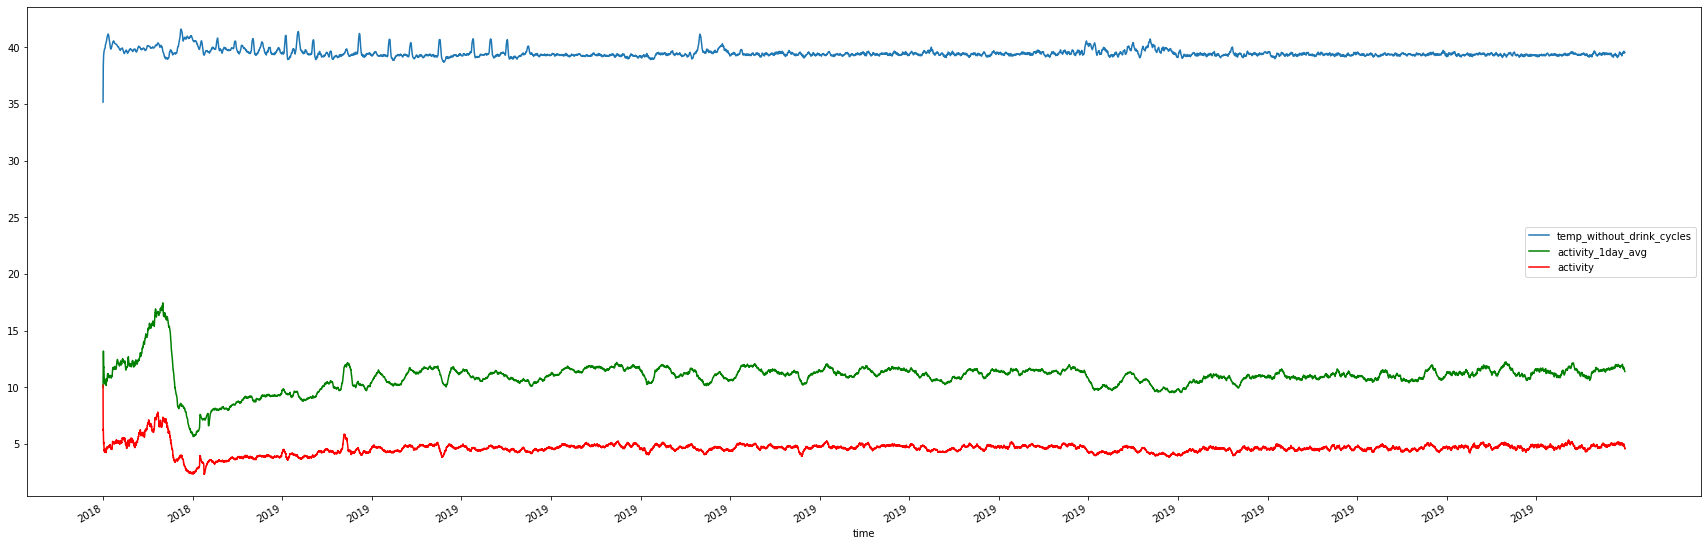

In [14]:
plot_cow(list(cows.keys())[0])

# for cow in cows.keys():
#     plot_cow(cow)